In [67]:
import pandas as pd 
import numpy as np
data = pd.read_csv("https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/auto/auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [68]:
data_auto.shape

(406, 9)

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
data["mpg"] = data["mpg"].dropna() #remove missing or null values from the "mpg" 

Text(0, 0.5, 'MGP')

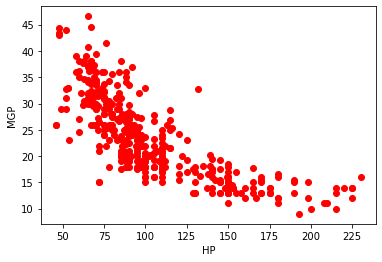

In [71]:
data["horsepower"] = data["horsepower"].dropna()
plt.plot(data["horsepower"], data["mpg"], "ro")
plt.xlabel("HP")
plt.ylabel("MGP")

## LR Model

In [72]:
from sklearn.linear_model import LinearRegression

#mpg= a+b*HP
x = data["horsepower"].fillna(data["horsepower"].mean())
y = data["mpg"].fillna(data["mpg"].mean())


In [73]:
Xdata = np.array(x)[:, np.newaxis]

In [74]:
lm = LinearRegression() # capital L
lm.fit(Xdata, y)

LinearRegression()

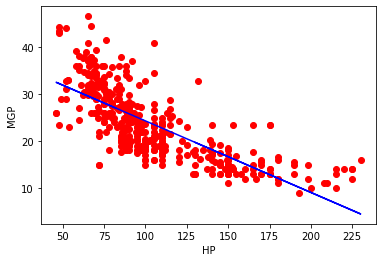

In [75]:
%matplotlib inline
plt.plot(x, y, "ro")
plt.xlabel("HP")
plt.ylabel("MGP")
plt.plot(x, lm.predict(Xdata), color="blue")                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [76]:
lm.score(Xdata, y)

0.574653340645025

In [77]:
SSD=np.sum((y-lm.predict(Xdata))**2) 
#SSD is a measure of how well the linear regression model fits the data. 
#Here, y represents the actual values of the dependent variable, and lm.predict(Xdata) 
#represents the predicted values of the dependent variable obtained from the linear regression model.
RSE=np.sqrt(SSD/len(Xdata)-1)
# measure of how much the actual values deviate from the predicted values, on average. 
#Here, len(Xdata)-1 represents the degrees of freedom, which is the number of observations 
#minus the number of parameters estimated by the model.
y_mean=np.mean(y)
error=RSE/y_mean
SSD, RSE, y_mean, error*100
#SSD- desv. tipica
#23 miles x 1 gallon up n down 5

(10315.75196006092, 4.940471238582748, 23.51457286432162, 21.010252948625173)

#### Other way to check the score
## QUADRATIC REGRESSION MODEL

In [78]:
Xdata = x**2
Xdata = np.array(Xdata)[:, np.newaxis]
lm = LinearRegression()
lm.fit(Xdata, y)

LinearRegression()

In [79]:
lm.score(Xdata, y)

0.4849887034823205

In [80]:
SSD=np.sum((y-lm.predict(Xdata))**2) 

RSE=np.sqrt(SSD/len(Xdata)-1)

y_mean=np.mean(y)
error=RSE/y_mean
SSD, RSE, y_mean, error*100
#SSD- desv. tipica
#23 miles x 1 gallon up n down 5

(12490.350340501926, 5.455676832957554, 23.51457286432162, 23.20125848951901)

### Looking for other ways to make the model better

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [108]:
poly = PolynomialFeatures(degree=2)
#flatten the input array and reshape it to a 2D array
Xdata = poly.fit_transform(x.ravel()[:, np.newaxis])
lm = LinearRegression()
lm.fit(Xdata, y)
lm.score(Xdata, y)

0.6439066584257469

In [109]:


SSD = np.sum((y - lm.predict(Xdata)) ** 2)
RSE = np.sqrt(SSD / (len(Xdata) - 1))
y_mean = np.mean(y)
error = RSE / y_mean
SSD, RSE, y_mean, error * 100


(8636.180643524502, 4.61778115803654, 23.51457286432162, 19.63795466190689)

## Outliers

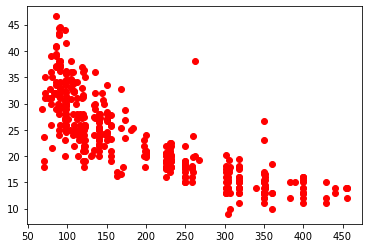

In [113]:
plt.plot(data["displacement"], data["mpg"],"ro")

In [147]:
x=data["displacement"].fillna(data["displacement"].mean())
Xdata = poly.fit_transform(x.ravel()[:, np.newaxis])
x= x.ravel()[:, np.newaxis]
y = data["mpg"].fillna(data["mpg"].mean())
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [148]:
lm.score(x,y)

0.6261049762826918

In [149]:
data[(data["displacement"]>300)&(data["mpg"]>20)]
data = data.drop([372,305,258,395])

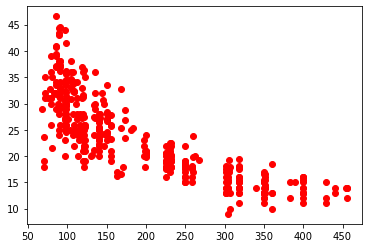

In [150]:
plt.plot(data["displacement"], data["mpg"],"ro")

In [151]:
x=data["displacement"].fillna(data["displacement"].mean())
Xdata = poly.fit_transform(x.ravel()[:, np.newaxis])
x= x.ravel()[:, np.newaxis]
y = data["mpg"].fillna(data["mpg"].mean())
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [152]:
lm.score(x,y) #As we see,  it has improved

0.6466514317531822